## Pobranie potrzebnych pakietów i funkcji

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh_tridiagonal
from scipy.optimize import minimize
from scipy.special import factorial,hermite
from scipy.integrate import simps
from astropy import units, constants

## Ustalanie stałych
Sprawdzenie czy $\alpha$ faktycznie jest 1 dla oscylatora harmonicznego

In [2]:
Omega = 600e12 * units.hertz * 2*np.pi
l = np.sqrt(constants.hbar/constants.m_e/Omega)
v = constants.hbar*Omega/2
alpha = 2*constants.m_e*v*(l)**2/constants.hbar**2
print(alpha.to(units.dimensionless_unscaled))

1.0000000000000002


I jak widać jest! :)
## Schemat liczenia wartości i funkcji własnych

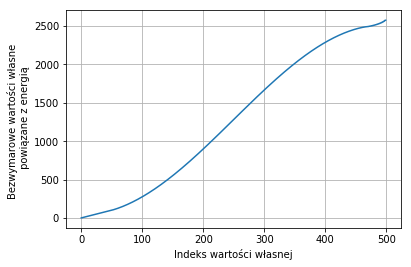

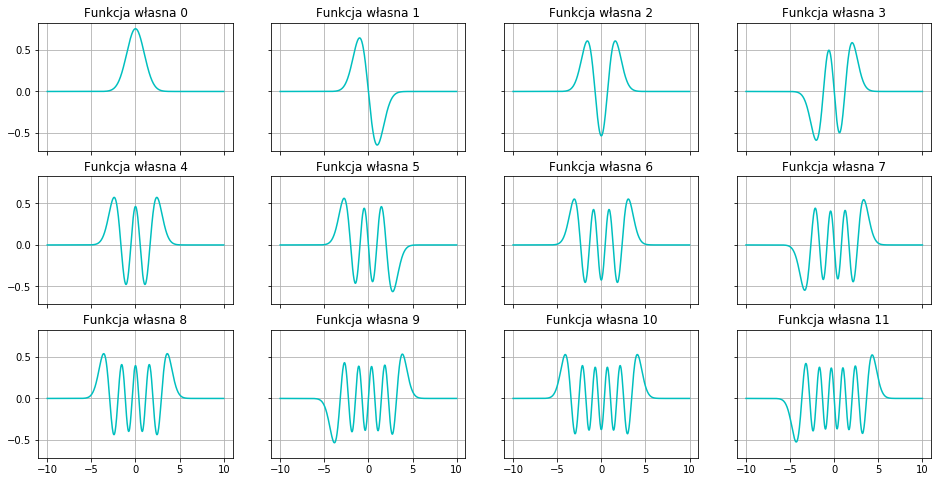

In [3]:
n = 500
L = 10
x, dx = np.linspace(-L,L,n,retstep=True)
M_diag = (x*dx)**2 + 2
M_ndiag = -np.ones(len(x)-1)
val, vec = eigh_tridiagonal(M_diag,M_ndiag)
val /= dx**2
for i in range(len(vec)):
    normalizacja = np.sqrt(simps(vec[i]**2, x))
    vec[i] /= normalizacja
plt.plot(val)
plt.xlabel('Indeks wartości własnej')
plt.ylabel('Bezwymarowe wartości własne \n powiązane z energią')
plt.grid()
ile_wykresow = 12
fig, ax = plt.subplots(ile_wykresow//4, 4, figsize=(16, 2/3*ile_wykresow), sharex=True, sharey=True)
for index, num in enumerate(vec.T[:ile_wykresow]):
    i = index //4
    j = index % 4
    ax[i,j].plot(x, num,'c')
    ax[i,j].set_title(f"Funkcja własna {index}")
    ax[i,j].grid()

## Definiowanie teoretycznych energii i funkcji

In [4]:
val_teoretyczne = (np.arange(n)*2+1)
energia_teoretyczna = val_teoretyczne * v
func = []
def zestaw_teoretyczny(n,L,wykresy):
    x, dx = np.linspace(-L,L,n,retstep=True)
    val_teoretyczne = (np.arange(n)*2+1)
    energia_teoretyczna = val_teoretyczne * v
    for i in range(wykresy): 
        func.append(np.sqrt(1/(np.sqrt(np.pi))) / np.sqrt(2**1 * factorial(i)) \
                     * np.exp(-(x)**2/2) * hermite(i)(x))
        normalizacja = np.sqrt(simps(func[i]**2, x))
        func[i] /= normalizacja

## Sprawdzenie dla wartości własnych

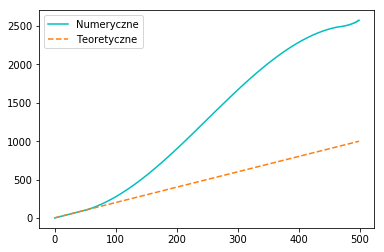

In [5]:
zestaw_teoretyczny(n,L,0)
plt.plot(val,'c',label='Numeryczne')
plt.plot(val_teoretyczne,'C1--',label='Teoretyczne')
plt.legend()

## Minimalizacja błędu wartości własnych

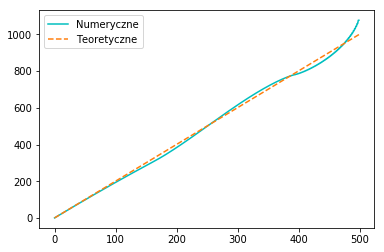

In [6]:
def error(L,plot=False):
    x, dx = np.linspace(-L,L,n,retstep=True)
    M_diag = (x*dx)**2 + 2
    M_ndiag = -np.ones(len(x)-1)
    val, vec = eigh_tridiagonal(M_diag,M_ndiag)
    val /= dx**2
    val_teoretyczne = (np.arange(n)*2+1)
    if(plot):
        plt.plot(val,'c',label='Numeryczne')
        plt.plot(val_teoretyczne,'C1--',label='Teoretyczne')
        plt.legend()
        return x, vec
    error = np.sum((val-val_teoretyczne)**2) 
    return error
zminimalizowane = minimize(error,1)
x, vec = error(zminimalizowane.x,True)
for i in range(len(vec)):
    normalizacja = np.sqrt(simps(vec[i]**2, x))
    vec[i] /= normalizacja

## Wykresy dla funkcji własnych

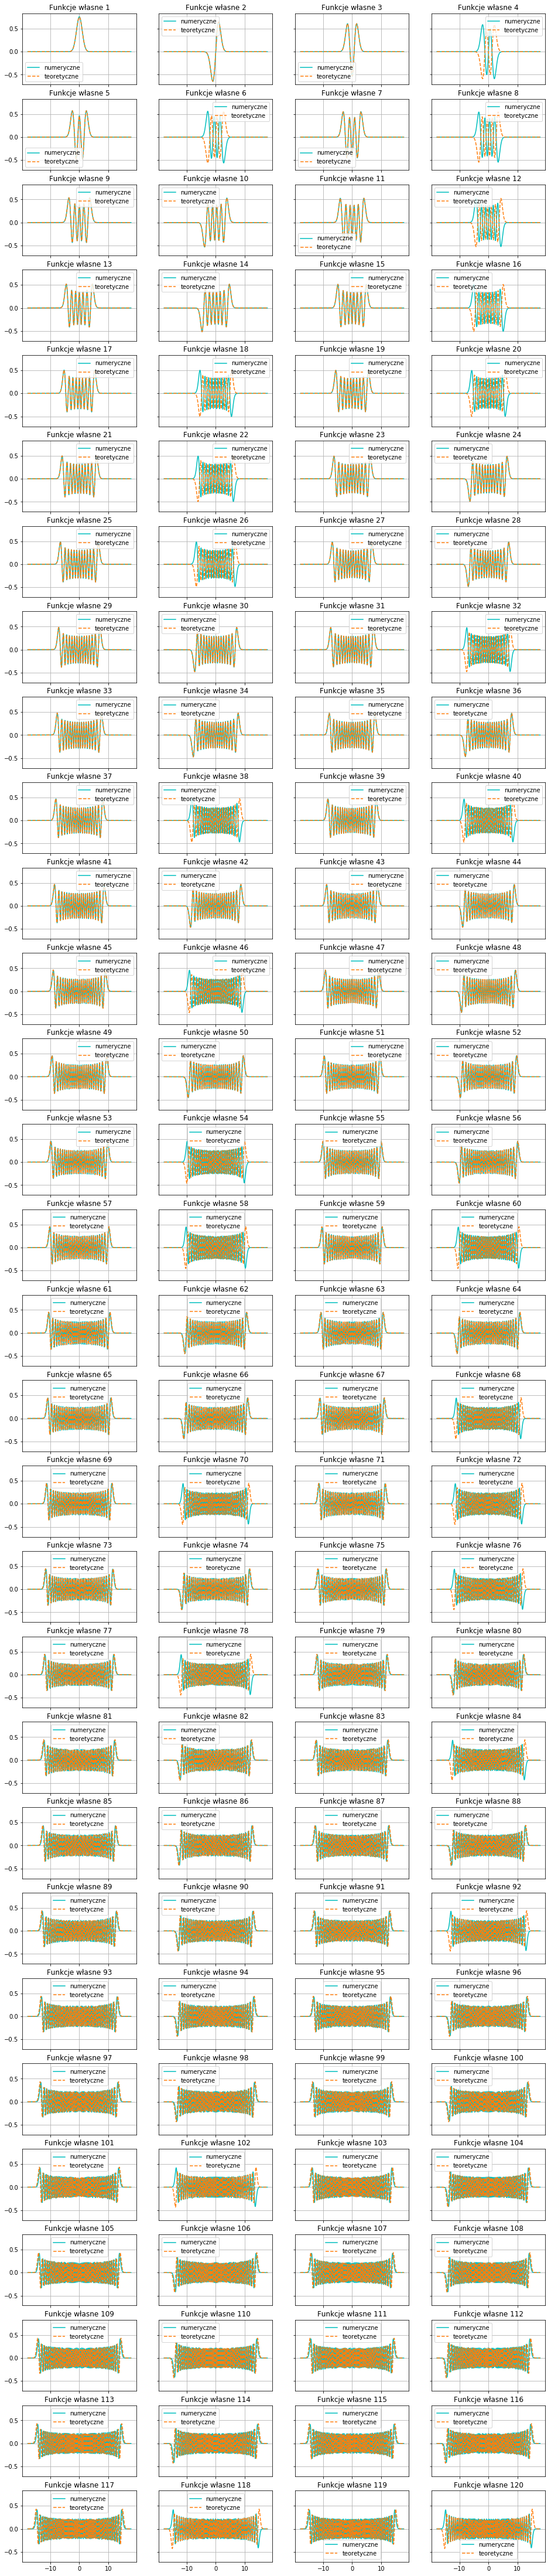

In [7]:
func = []
rows = n//5 + 20
zestaw_teoretyczny(n,zminimalizowane.x,rows)
fig, ax = plt.subplots(rows//4, 4, figsize=(16, 2/3*rows), sharex=True, sharey=True)
for index, num in enumerate(vec.T[:rows]):
    i = index //4
    j = index % 4
    ax[i,j].plot(x, num,'c',label = 'numeryczne')
    try:
        ax[i,j].plot(x, func[index],'--C1',label='teoretyczne')
#         ax[i,j].plot(x, np.abs(num) - np.abs(func[index]),'--C1',label='teoretyczne')
    except IndexError:
        pass
    ax[i,j].set_title(f"Funkcje własne {index+1}")
    ax[i,j].grid()
    ax[i,j].legend()

### Funkcje własne zgadzają się z teoretycznymi (z dokładnością do fazy, co widać na przykład na wykresach 4 i 6)

## Dodatkowe sprawdzenie różnicy modułów wartości numerycznej i teoretycznej
Modułów przez różnice fazy

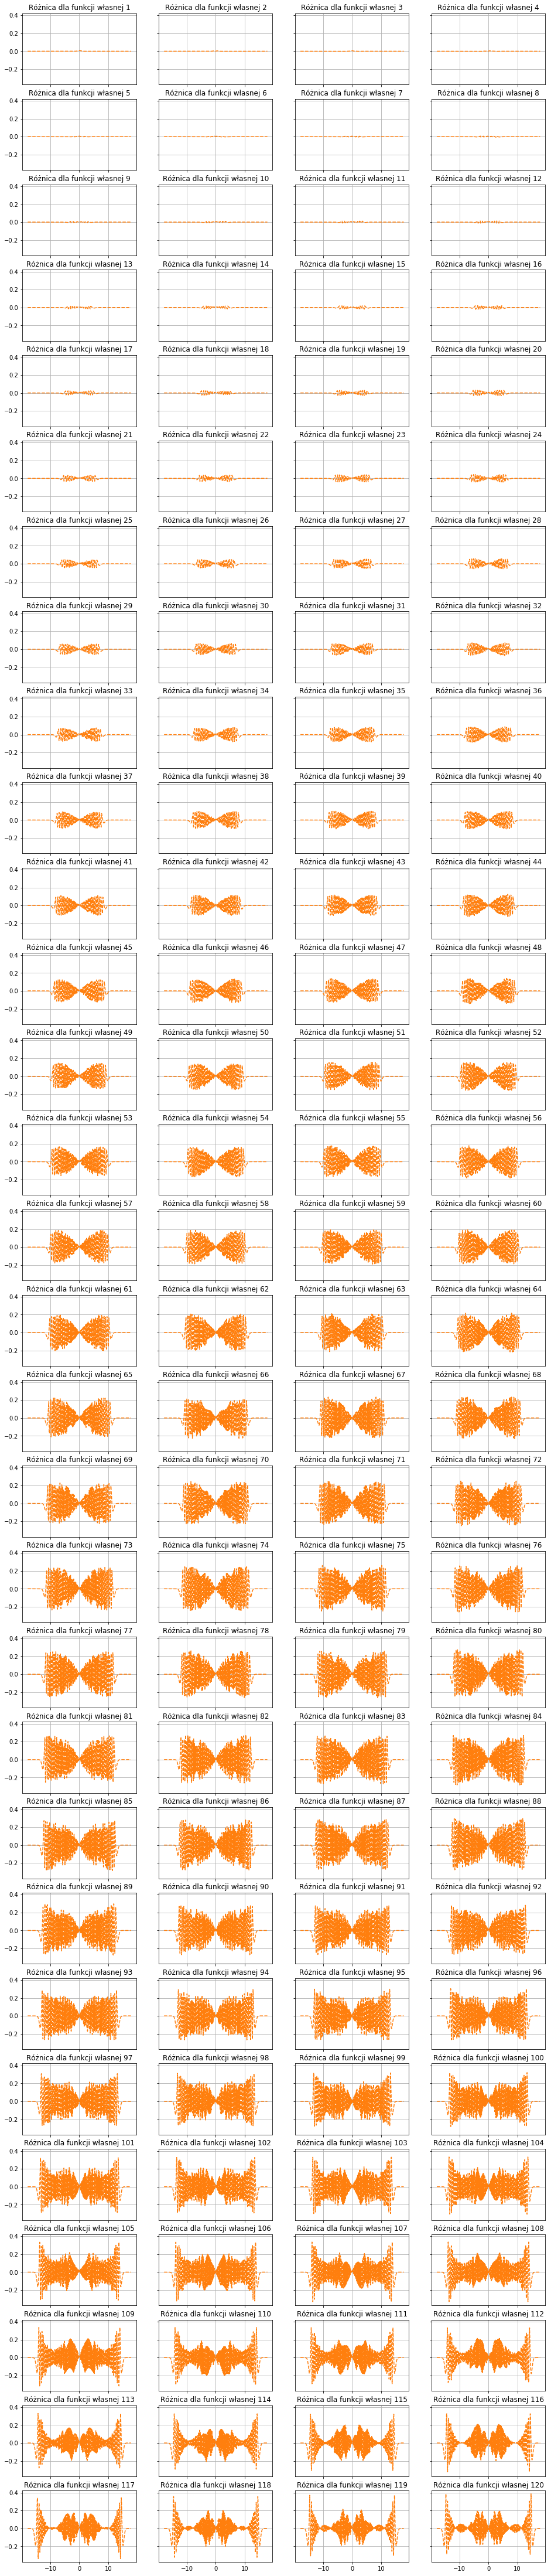

In [8]:
fig, ax = plt.subplots(rows//4, 4, figsize=(16, 2/3*rows), sharex=True, sharey=True)
for index, num in enumerate(vec.T[:rows]):
    i = index //4
    j = index % 4
    try:
        ax[i,j].plot(x, np.abs(num) - np.abs(func[index]),'--C1')
    except IndexError:
        pass
    ax[i,j].set_title(f"Różnica dla funkcji własnej {index+1}")
    ax[i,j].grid()

Zasadniczo błąd rośnie z każdą kolejną funkcją. Przy ok. 20 zaczyna przekraczać 20% amplitudy. 